# Project Code

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
memory_df = pd.read_csv('hippoCorpusV2.csv')

### Prepping the data to merge for retold stories

In [3]:
memory_df

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,XI8VK89S,25.0,man,white,1.0,1.0,NaN,3.0,...,when I got concert tickets,0.000,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,1HN5ZZ1D,25.0,woman,white,1.0,1.0,3.0,4.0,...,we saw the beautiful sky.,1.000,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,NaN,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,8SBPL7EI,35.0,woman,black,1.0,1.0,NaN,4.0,...,she went into labor early,0.500,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,M1QQED2V,30.0,woman,white,1.0,4.0,3.0,5.0,...,finding out they were healthy.,1.000,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,NaN,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,DU3RPZDB,25.0,man,white,2.0,2.0,NaN,3.0,...,When I don't answer the phone in case I owe th...,0.250,NaN,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1,926,KVSO6L8P,30.0,woman,other,3.0,5.0,3.0,5.0,...,the kitten ran into my arms.,0.125,NaN,NaN,NaN,NaN,My dog was diagnosed with lymphoma a year ago ...,5.0,"My dog, who had lymphoma, was suffering so I h...",150.0
6850,39PAAFCODNMWRITC4CBO6VRL6O4TV3,3044,QJB7AXPP,18.0,woman,asian,4.0,2.0,4.0,2.0,...,when i encountered an guy who was really scared,-0.500,NaN,NaN,NaN,NaN,"Over my vacation from my job, I went to Casper...",5.0,"On vacation, a side job was taken to plan an e...",570.0
6851,3FE2ERCCZYU396R8MJGQ6TWGLSMOPR,1008,IJP8D12L,35.0,man,asian,1.0,2.0,2.0,4.0,...,a lot of people got in the pool.,0.500,NaN,NaN,NaN,NaN,This event was a birthday party for my nephew....,2.0,This was a birthday party for my nephew that h...,21.0
6852,3J88R45B2HKQ3F50NA3MP6N9XXKPXS,1462,LCKEHYRF,30.0,man,hisp,1.0,1.0,3.0,3.0,...,my cousin threw a tantrum in the middle of the...,0.500,NaN,NaN,NaN,NaN,This event occurred about two weeks ago. I was...,2.0,It was my little cousin's birthday and went to...,14.0


In [3]:
mask1 = memory_df['AssignmentId'] == memory_df['recAgnPairId']

In [4]:
retold_recall = memory_df[~mask1].copy()

In [5]:
retold_table = memory_df.merge(retold_recall, left_on='AssignmentId', right_on='recAgnPairId', suffixes=['_1st','_2nd'])

### Prepping the data to merge for Imagined stories 

In [6]:
mask = memory_df['AssignmentId'] == memory_df['recImgPairId']

In [7]:
imagined_recall = memory_df[~mask].copy()

### Creating new table that merges on the ID values

In [8]:
imagined_table = memory_df.merge(imagined_recall, left_on='AssignmentId', right_on='recImgPairId', suffixes=['_1st','_2nd'])


In [9]:
imagined_table[['story_1st','story_2nd']]

,story_1st,story_2nd
0,"The day started perfectly, with a great drive ...","Concerts are my most favorite thing, and my bo..."
1,"Five months ago, my niece and nephew were born...",It seems just like yesterday but today makes f...
2,Burning Man metamorphoses was perfect. I am de...,About a month ago I went to burning man. I was...
3,"Dear Diary,I would say this happened about 3 m...","Play stupid games, win stupid prizes road trip..."
4,About a month ago me and my girlfriend went to...,I wanted to write about one of the best days i...
...,...,...
2751,An incredible day that I still can't believe h...,My oldest daughter starting Kindergarten was o...
2752,Memorable day of my life. This reminds me of 5...,I lived the typical American fantasy. I met my...
2753,"This past March, we held a memorial service fo...",What a long journey I've been on. These last 5...
2754,I woke up with contractions around 10pm. I kep...,The birth of my son was an experience I'll nev...


In [10]:
imagined_table["similarity_2nd"].value_counts()

1.0    683
4.0    611
3.0    523
5.0    488
2.0    451
Name: similarity_2nd, dtype: int64

**Data Analysis**

In [11]:
#checking the distribution of age cross-sectioned by gender to check the gender distribution of a certain age range.
memory_df.groupby(['annotatorAge','annotatorGender']).count()

AssignmentId  WorkTimeInSeconds  WorkerId  \
annotatorAge annotatorGender                                              
18.0         man                       273                273       273   
             na                          5                  5         5   
             nonBinary                   5                  5         5   
             transman                    2                  2         2   
             woman                     303                303       303   
25.0         man                       940                940       940   
             na                          1                  1         1   
             nonBinary                   6                  6         6   
             other                       1                  1         1   
             transman                    4                  4         4   
             transwoman                  1                  1         1   
             woman                     608                608       608   
30.0         man                       911                911       911   
             na                          4                  4         4   
             nonBinary                   9                  9         9   
             transman                    4                  4         4   
             transwoman                  1                  1         1   
             woman                     630                630       630   
35.0         man                       493                493       493   
             na                          1                  1         1   
             nonBinary                   3                  3         3   
             other                       2                  2         2   
             woman                     676                676       676   
40.0         man                       260                260       260   
             na                          2                  2         2   
             woman                     336                336       336   
45.0         man                       193                193       193   
             woman                     286                286       286   
50.0         man                       110                110       110   
             woman                     226                226       226   
55.0         man                       179                179       179   
             woman                     356                356       356   

                              annotatorRace  distracted  draining  frequency  \
annotatorAge annotatorGender                                                   
18.0         man                        273         273       273        151   
             na                           5           5         5          4   
             nonBinary                    5           5         5          4   
             transman                     2           2         2          2   
             woman                      303         303       303        185   
25.0         man                        940         940       940        489   
             na                           1           1         1          0   
             nonBinary                    6           6         6          4   
             other                        1           1         1          1   
             transman                     4           4         4          2   
             transwoman                   1           1         1          1   
             woman                      608         608       608        343   
30.0         man                        911         911       911        479   
             na                           4           4         4          2   
             nonBinary                    9           9         9          7   
             transman                     4           4         4          3   
             transwoman                

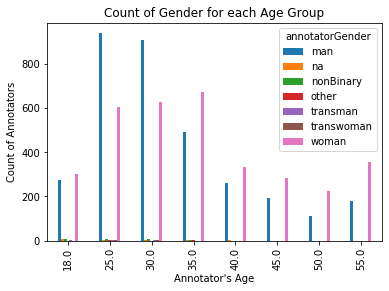

In [38]:
ax = memory_df.groupby(['annotatorAge','annotatorGender']).count()['AssignmentId'].unstack().plot(by='annotatorRace', kind ='bar', title='Count of Gender for each Age Group')
ax.set_xlabel("Annotator's Age")
ax.set_ylabel("Count of Annotators")
#fig1 = ax.get_figure()
#fig1.savefig('gender.pdf')

In [17]:
memory_df.groupby('annotatorAge')['annotatorRace'].count()

annotatorAge
18.0     588
25.0    1561
30.0    1559
35.0    1175
40.0     598
45.0     479
50.0     336
55.0     535
Name: annotatorRace, dtype: int64

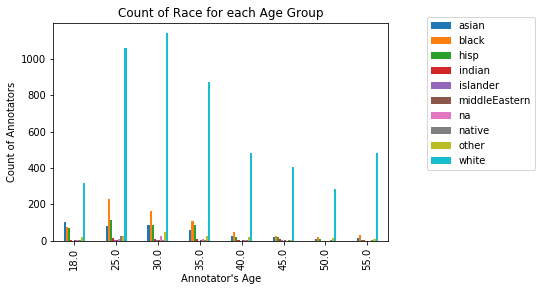

In [37]:
ax1 = memory_df.groupby(['annotatorAge','annotatorRace']).count()['AssignmentId'].unstack().plot(by='annotatorRace', kind ='bar', title = 'Count of Race for each Age Group')
ax1.set_xlabel("Annotator's Age")
ax1.set_ylabel("Count of Annotators")
ax1.legend(bbox_to_anchor=(1.1, 1.05))
#fig = ax1.get_figure()
#fig.savefig('race.pdf')

### Analysis

In [39]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']

**TF_IDF Analysis for imagined_table**

In [40]:
ori_story_wordlist = []
recall_story_wordlist = []

for x in range(len(imagined_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X = imagined_table.iloc[x]['story_1st']
    Y = imagined_table.iloc[x]['story_2nd']

    # tokenization & removing any characater that is not of the alphabet
    X_list = word_tokenize(X.lower()) 
    X_list = [word for word in X_list if word.isalpha()]

    Y_list = word_tokenize(Y.lower()) 
    Y_list = [word for word in Y_list if word.isalpha()]


    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    L1 =[];l2 =[] 

    # remove stop words from the string 
    X_list = [w for w in X_list if not w in sw]  
    Y_list = [w for w in Y_list if not w in sw]
    
    # lemmetize each word in the string.
    lem = WordNetLemmatizer()
    
    X_list = [lem.lemmatize(w) for w in X_list]
    X_list = [lem.lemmatize(w, pos="a") for w in X_list]
    X_list = [lem.lemmatize(w, pos="v") for w in X_list]
    
    Y_list = [lem.lemmatize(w) for w in Y_list]
    Y_list = [lem.lemmatize(w, pos="a") for w in Y_list]
    Y_list = [lem.lemmatize(w, pos="v") for w in Y_list]
    
    ori_story_wordlist.append(' '.join(X_list))
    recall_story_wordlist.append(' '.join(Y_list))
    # count the occurance of each word in the paragraph (Term frequencies)
#     DF = {}
#     DF2 = {}
#     for w in X_list:
#         try:
#             DF[w].add(w)
#         except:
#             DF[w] = {w}
            
#     for w in Y_list:
#         try:
#             DF2[w].add(w)
#         except:
#             DF2[w] = {w}    


In [16]:
# imagined_table["ori_story"] = ori_story_wordlist
# imagined_table["recall_story"] = recall_story_wordlist

# imagined_table

In [17]:
# imagine_age_story = imagined_table[["recall_story", "annotatorAge_2nd"]].groupby("annotatorAge_2nd", as_index=False).sum()

# imagine_age_story

In [18]:
# def freq(string):
#     words = []
#     words = string.split()
#     wfreq=[words.count(w) for w in words]
#     print (dict(zip(words,wfreq)))

# imagine_age_story["freq"] = imagine_age_story["recall_story"].apply(freq)

In [19]:
# imagine_age_story

In [20]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(imagined_table["ori_story"])
# word = vectorizer.get_feature_names()
# # print(word)
# # print (X.toarray())
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
# # print(transformer)
# tfidf = transformer.fit_transform(X)

In [21]:
# tfidf

In [22]:
# len(imagined_table)

**Below takes each word and returns the occurance of that word in each paragraph**
<br>**The TF we see here is for the last paragraph for the original story and the retold story**

In [23]:
# for i in DF:
#     DF[i] = len(DF[i])

In [24]:
# for i in DF2:
#     DF2[i] = len(DF2[i])

In [25]:
# DF2

**similarity score for imagined_table**

In [26]:
similarityscore = []

for x in range(len(imagined_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X =imagined_table.iloc[x]['story_1st']
    Y =imagined_table.iloc[x]['story_2nd']

    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from the string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    similarityscore.append(cosine)

similarityscore

[0.21639411503919442,
 0.2875273163926476,
 0.24847809402832968,
 0.2524416575189768,
 0.2913120698962612,
 0.12411432056761817,
 0.10502905111472904,
 0.1520302849670743,
 0.19841894753313627,
 0.22795136315904263,
 0.19897393679804515,
 0.28382310609877337,
 0.24975235258904446,
 0.20832691310086804,
 0.2376259016650447,
 0.2414022747926338,
 0.22605121812109852,
 0.28414805603066345,
 0.23309479542697095,
 0.23003312289453756,
 0.200631073560347,
 0.25342662267125027,
 0.22110831935702666,
 0.23435921664027304,
 0.2107910657112095,
 0.15609763526361567,
 0.27920353227953804,
 0.21586173087972535,
 0.14201926382463348,
 0.26647402004950604,
 0.22836050223727594,
 0.3320903209244786,
 0.19219999204171925,
 0.18544954675472894,
 0.1652067845269884,
 0.21428571428571427,
 0.27722462871098325,
 0.17315416054977326,
 0.23240705576282605,
 0.18906402929636987,
 0.10581880979127743,
 0.22094727066644299,
 0.2552071795129729,
 0.24666515622786542,
 0.24779731389167603,
 0.2147525414825155,
 

In [27]:
imagined_table["similarityscore"] = similarityscore

**similarity score for retold table**

In [28]:
similarityscore = []

for x in range(len(retold_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X =retold_table.iloc[x]['story_1st']
    Y =retold_table.iloc[x]['story_2nd']

    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from the string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    similarityscore.append(cosine)

similarityscore

[0.4280872216282414,
 0.12389865694583801,
 0.24052559968237083,
 0.3353811856664205,
 0.39641248358604597,
 0.31522376824282927,
 0.30803622676415365,
 0.2871284522502134,
 0.43701422443753785,
 0.2239946675952602,
 0.4238056611641329,
 0.28576851409760834,
 0.2994447585743575,
 0.2015201296254569,
 0.2983291648719478,
 0.3165104909423466,
 0.29427679302959425,
 0.3611575592573076,
 0.3971565759865616,
 0.265137226222802,
 0.2917299829957891,
 0.20085755514795633,
 0.25692398714174913,
 0.3783023939287672,
 0.3352605601256073,
 0.30661753635093675,
 0.3534769019632128,
 0.25117035750264866,
 0.34981144684377136,
 0.24726787726297153,
 0.2995623781155417,
 0.366146046676159,
 0.18985271618701324,
 0.4260429614980358,
 0.5057116329928112,
 0.21860194692967708,
 0.34568317191600745,
 0.309634030775262,
 0.24366266169609582,
 0.22315361518396576,
 0.4221585268381751,
 0.1818416649544526,
 0.22993062889751664,
 0.3796046930580413,
 0.18207699786637838,
 0.1679438245519263,
 0.1870086742656

In [29]:
retold_table["similarityscore"] = similarityscore

# **RETOLD STORIES (doesn't have similarity)**

In [30]:
retold_linear = retold_table[["WorkTimeInSeconds_2nd", "annotatorAge_2nd","annotatorGender_2nd","annotatorRace_2nd", "distracted_2nd",
              "draining_2nd","frequency_2nd","importance_2nd","logTimeSinceEvent_2nd","openness_2nd",
              "stressful_2nd","timeSinceEvent_2nd","similarityscore"]].copy()

In [31]:
retold_linear.dropna(how="any", inplace=True)

In [32]:
retold_linear_regr = pd.get_dummies(retold_linear)

In [33]:
retold_linear_regr

,WorkTimeInSeconds_2nd,annotatorAge_2nd,distracted_2nd,draining_2nd,frequency_2nd,importance_2nd,logTimeSinceEvent_2nd,openness_2nd,stressful_2nd,timeSinceEvent_2nd,...,annotatorRace_2nd_asian,annotatorRace_2nd_black,annotatorRace_2nd_hisp,annotatorRace_2nd_indian,annotatorRace_2nd_islander,annotatorRace_2nd_middleEastern,annotatorRace_2nd_na,annotatorRace_2nd_native,annotatorRace_2nd_other,annotatorRace_2nd_white
0,7228,25.0,1.0,1.0,2.0,2.0,5.347108,0.625,1.0,210.0,...,0,0,1,0,0,0,0,0,0,0
1,4925,30.0,3.0,4.0,3.0,3.0,5.192957,0.250,4.0,180.0,...,0,1,0,0,0,0,0,0,0,0
2,6488,30.0,4.0,4.0,4.0,4.0,4.094345,-0.125,3.0,60.0,...,0,0,0,0,0,0,0,0,0,1
3,1405,30.0,1.0,1.0,4.0,4.0,4.094345,-0.250,1.0,60.0,...,0,0,1,0,0,0,0,0,0,0
4,612,30.0,1.0,1.0,5.0,5.0,5.480639,1.000,1.0,240.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,458,30.0,1.0,4.0,4.0,5.0,5.010635,0.625,2.0,150.0,...,0,0,0,0,0,0,0,0,0,1
1306,1999,30.0,1.0,1.0,2.0,2.0,5.192957,0.625,1.0,180.0,...,0,0,0,0,0,0,0,0,0,1
1307,1081,50.0,1.0,1.0,3.0,5.0,5.480639,-0.125,1.0,240.0,...,0,0,0,0,0,0,0,0,0,1
1308,6008,40.0,1.0,1.0,4.0,5.0,4.094345,0.375,1.0,60.0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

y = retold_linear_regr['similarityscore'].values
X = retold_linear_regr.drop(['similarityscore'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
regr = LinearRegression().fit(X_train, y_train)
print(f'The MSE for the training set is {mean_squared_error(y_train, regr.predict(X_train))}')
print(f'The MSE for the test set is {mean_squared_error(y_test, regr.predict(X_test))}')

The MSE for the training set is 0.006848442799676028
The MSE for the test set is 0.010883167996246359


In [35]:
X

,WorkTimeInSeconds_2nd,annotatorAge_2nd,distracted_2nd,draining_2nd,frequency_2nd,importance_2nd,logTimeSinceEvent_2nd,openness_2nd,stressful_2nd,timeSinceEvent_2nd,...,annotatorRace_2nd_asian,annotatorRace_2nd_black,annotatorRace_2nd_hisp,annotatorRace_2nd_indian,annotatorRace_2nd_islander,annotatorRace_2nd_middleEastern,annotatorRace_2nd_na,annotatorRace_2nd_native,annotatorRace_2nd_other,annotatorRace_2nd_white
0,7228,25.0,1.0,1.0,2.0,2.0,5.347108,0.625,1.0,210.0,...,0,0,1,0,0,0,0,0,0,0
1,4925,30.0,3.0,4.0,3.0,3.0,5.192957,0.250,4.0,180.0,...,0,1,0,0,0,0,0,0,0,0
2,6488,30.0,4.0,4.0,4.0,4.0,4.094345,-0.125,3.0,60.0,...,0,0,0,0,0,0,0,0,0,1
3,1405,30.0,1.0,1.0,4.0,4.0,4.094345,-0.250,1.0,60.0,...,0,0,1,0,0,0,0,0,0,0
4,612,30.0,1.0,1.0,5.0,5.0,5.480639,1.000,1.0,240.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,458,30.0,1.0,4.0,4.0,5.0,5.010635,0.625,2.0,150.0,...,0,0,0,0,0,0,0,0,0,1
1306,1999,30.0,1.0,1.0,2.0,2.0,5.192957,0.625,1.0,180.0,...,0,0,0,0,0,0,0,0,0,1
1307,1081,50.0,1.0,1.0,3.0,5.0,5.480639,-0.125,1.0,240.0,...,0,0,0,0,0,0,0,0,0,1
1308,6008,40.0,1.0,1.0,4.0,5.0,4.094345,0.375,1.0,60.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
#y = retold_linear_regr['similarityscore'].values
#X = retold_linear_regr.drop(['similarityscore','annotatorGender_2nd_na','annotatorGender_2nd_transman','annotatorGender_2nd_nonBinary'], axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
#regr = LinearRegression().fit(X_train, y_train)
#print(f'The MSE for the training set is {mean_squared_error(y_train, regr.predict(X_train))}')
#print(f'The MSE for the test set is {mean_squared_error(y_test, regr.predict(X_test))}')

The MSE for the training set is 0.006857660560869531
The MSE for the test set is 0.010867949444994899


In [37]:
X_train.columns

Index(['WorkTimeInSeconds_2nd', 'annotatorAge_2nd', 'distracted_2nd',
       'draining_2nd', 'frequency_2nd', 'importance_2nd',
       'logTimeSinceEvent_2nd', 'openness_2nd', 'stressful_2nd',
       'timeSinceEvent_2nd', 'annotatorGender_2nd_man',
       'annotatorGender_2nd_woman', 'annotatorRace_2nd_asian',
       'annotatorRace_2nd_black', 'annotatorRace_2nd_hisp',
       'annotatorRace_2nd_indian', 'annotatorRace_2nd_islander',
       'annotatorRace_2nd_middleEastern', 'annotatorRace_2nd_na',
       'annotatorRace_2nd_native', 'annotatorRace_2nd_other',
       'annotatorRace_2nd_white'],
      dtype='object')

**StatsAPI**

In [38]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices("similarityscore ~ WorkTimeInSeconds_2nd + annotatorAge_2nd + distracted_2nd + draining_2nd + importance_2nd + logTimeSinceEvent_2nd + openness_2nd + stressful_2nd + annotatorGender_2nd_man + annotatorGender_2nd_na + annotatorGender_2nd_nonBinary + annotatorGender_2nd_transman + annotatorGender_2nd_woman + annotatorRace_2nd_asian + annotatorRace_2nd_black + annotatorRace_2nd_hisp + annotatorRace_2nd_indian + annotatorRace_2nd_islander + annotatorRace_2nd_middleEastern + annotatorRace_2nd_na + annotatorRace_2nd_native + annotatorRace_2nd_white", data=retold_linear_regr, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        similarityscore   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.281
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           4.29e-10
Time:                        13:14:53   Log-Likelihood:                 1299.2
No. Observations:                1304   AIC:                            -2554.
Df Residuals:                    1282   BIC:                            -2441.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [39]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices("similarityscore ~ WorkTimeInSeconds_2nd + annotatorAge_2nd + distracted_2nd + draining_2nd + importance_2nd + logTimeSinceEvent_2nd + openness_2nd + stressful_2nd + annotatorGender_2nd_man + annotatorGender_2nd_woman + annotatorRace_2nd_asian + annotatorRace_2nd_black + annotatorRace_2nd_hisp + annotatorRace_2nd_indian + annotatorRace_2nd_islander + annotatorRace_2nd_middleEastern + annotatorRace_2nd_na + annotatorRace_2nd_native + annotatorRace_2nd_white", data=retold_linear_regr, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        similarityscore   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.579
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           2.81e-10
Time:                        13:14:53   Log-Likelihood:                 1297.8
No. Observations:                1304   AIC:                            -2556.
Df Residuals:                    1284   BIC:                            -2452.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

**Lasso Regression**

In [40]:
lasso = Lasso().fit(X_train, y_train)
print(lasso.coef_)
X_train.columns

[-8.43529555e-07  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]


Index(['WorkTimeInSeconds_2nd', 'annotatorAge_2nd', 'distracted_2nd',
       'draining_2nd', 'frequency_2nd', 'importance_2nd',
       'logTimeSinceEvent_2nd', 'openness_2nd', 'stressful_2nd',
       'timeSinceEvent_2nd', 'annotatorGender_2nd_man',
       'annotatorGender_2nd_woman', 'annotatorRace_2nd_asian',
       'annotatorRace_2nd_black', 'annotatorRace_2nd_hisp',
       'annotatorRace_2nd_indian', 'annotatorRace_2nd_islander',
       'annotatorRace_2nd_middleEastern', 'annotatorRace_2nd_na',
       'annotatorRace_2nd_native', 'annotatorRace_2nd_other',
       'annotatorRace_2nd_white'],
      dtype='object')

In [41]:
print(mean_squared_error(y_train, lasso.predict(X_train)))
print(mean_squared_error(y_test, lasso.predict(X_test)))

0.007711832559649308
0.011029128828290722


**Ridge Regression** 

In [42]:
ridge = Ridge().fit(X_train, y_train)
print(ridge.coef_)
X_train.columns

[-1.59586135e-07 -9.27923135e-06 -7.40185397e-03  4.42799355e-03
 -1.33546471e-02 -3.81375328e-03  3.67310542e-02 -1.04300208e-02
 -1.13996544e-02 -1.47822811e-04 -6.65351978e-02 -6.40298961e-02
  3.56435570e-02  1.70010659e-03 -1.28525223e-02  3.87095717e-02
  5.36589500e-03 -1.06300789e-03 -5.57898384e-02 -2.74164944e-02
  3.98203556e-03  1.17206971e-02]


Index(['WorkTimeInSeconds_2nd', 'annotatorAge_2nd', 'distracted_2nd',
       'draining_2nd', 'frequency_2nd', 'importance_2nd',
       'logTimeSinceEvent_2nd', 'openness_2nd', 'stressful_2nd',
       'timeSinceEvent_2nd', 'annotatorGender_2nd_man',
       'annotatorGender_2nd_woman', 'annotatorRace_2nd_asian',
       'annotatorRace_2nd_black', 'annotatorRace_2nd_hisp',
       'annotatorRace_2nd_indian', 'annotatorRace_2nd_islander',
       'annotatorRace_2nd_middleEastern', 'annotatorRace_2nd_na',
       'annotatorRace_2nd_native', 'annotatorRace_2nd_other',
       'annotatorRace_2nd_white'],
      dtype='object')

In [43]:
print(mean_squared_error(y_train, ridge.predict(X_train)))
print(mean_squared_error(y_test, ridge.predict(X_test)))

0.006864007655831402
0.010782840987823441


**Decision Tree Classifier**

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import plot_roc_curve
import graphviz
from sklearn.tree import export_graphviz


dt = DecisionTreeRegressor().fit(X_train, y_train)
print(f'{dt.feature_importances_}\n') 
print(X_train.columns.values)

print('\n')
print(f'The MSE is {mean_squared_error(y_train, dt.predict(X_train))}')
print(f'The MSE is {mean_squared_error(y_test, dt.predict(X_test))}')

#svc_disp = plot_roc_curve(dt2, X_test, Y_test)
#plt.show()

#dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns, filled=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph

#from graphviz import Source
#from sklearn import tree
#Source(export_graphviz(dt, out_file=None, feature_names=X_train.columns))

[0.30049427 0.10122262 0.03539324 0.03586465 0.05627287 0.06910467
 0.100338   0.08260668 0.04137764 0.08881012 0.0156629  0.
 0.00277686 0.         0.         0.         0.0183783  0.00316865
 0.00847127 0.01187638 0.00193199 0.         0.00113194 0.00149075
 0.0045621  0.00448299 0.01458112]

['WorkTimeInSeconds_2nd' 'annotatorAge_2nd' 'distracted_2nd'
 'draining_2nd' 'importance_2nd' 'logTimeSinceEvent_2nd' 'openness_2nd'
 'similarity_2nd' 'stressful_2nd' 'timeSinceEvent_2nd'
 'annotatorGender_2nd_man' 'annotatorGender_2nd_na'
 'annotatorGender_2nd_nonBinary' 'annotatorGender_2nd_other'
 'annotatorGender_2nd_transman' 'annotatorGender_2nd_transwoman'
 'annotatorGender_2nd_woman' 'annotatorRace_2nd_asian'
 'annotatorRace_2nd_black' 'annotatorRace_2nd_hisp'
 'annotatorRace_2nd_indian' 'annotatorRace_2nd_islander'
 'annotatorRace_2nd_middleEastern' 'annotatorRace_2nd_na'
 'annotatorRace_2nd_native' 'annotatorRace_2nd_other'
 'annotatorRace_2nd_white']


The MSE is 1.375024992201436e-09

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# IMAGINED STORIES 

In [45]:
imagined_linear = imagined_table[["WorkTimeInSeconds_2nd", "annotatorAge_2nd","annotatorGender_2nd","annotatorRace_2nd", "distracted_2nd",
              "draining_2nd","importance_2nd","logTimeSinceEvent_2nd","openness_2nd", "similarity_2nd",
              "stressful_2nd","timeSinceEvent_2nd","similarityscore"]].copy()
imagined_linear.dropna(how="any", inplace=True)
imagined_linear_regr = pd.get_dummies(imagined_linear)

y = imagined_linear_regr['similarityscore'].values
X = imagined_linear_regr.drop(['similarityscore'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
regr = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y_train, regr.predict(X_train)))
print(mean_squared_error(y_test, regr.predict(X_test)))


0.0026739803607414565
0.002968840688823999


**Stats API**

In [46]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices("similarityscore ~ WorkTimeInSeconds_2nd + annotatorAge_2nd + distracted_2nd + draining_2nd + importance_2nd + logTimeSinceEvent_2nd + openness_2nd + similarity_2nd + stressful_2nd + annotatorGender_2nd_man + annotatorGender_2nd_na + annotatorGender_2nd_nonBinary + annotatorGender_2nd_other + annotatorGender_2nd_transman + annotatorGender_2nd_transwoman + annotatorGender_2nd_woman + annotatorRace_2nd_asian + annotatorRace_2nd_black + annotatorRace_2nd_hisp + annotatorRace_2nd_indian + annotatorRace_2nd_islander + annotatorRace_2nd_middleEastern + annotatorRace_2nd_na + annotatorRace_2nd_native + annotatorRace_2nd_other + annotatorRace_2nd_white", data=imagined_linear_regr, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        similarityscore   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.567
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           4.38e-05
Time:                        13:14:53   Log-Likelihood:                 3984.7
No. Observations:                2604   AIC:                            -7919.
Df Residuals:                    2579   BIC:                            -7773.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [47]:
len(imagined_linear_regr.columns)

28

**Lasso Regression**

In [48]:
xtrain1 = X_train.drop('WorkTimeInSeconds_2nd', axis=1)
xtest1 = X_test.drop('WorkTimeInSeconds_2nd', axis=1)

In [49]:
lasso = Lasso().fit(X_train, y_train)
print(lasso.coef_)
print(f'\n{X_train.columns}')
print('\n')
print(mean_squared_error(y_train, lasso.predict(X_train)))
print(mean_squared_error(y_test, lasso.predict(X_test)))

[ 6.06493417e-08 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]

Index(['WorkTimeInSeconds_2nd', 'annotatorAge_2nd', 'distracted_2nd',
       'draining_2nd', 'importance_2nd', 'logTimeSinceEvent_2nd',
       'openness_2nd', 'similarity_2nd', 'stressful_2nd', 'timeSinceEvent_2nd',
       'annotatorGender_2nd_man', 'annotatorGender_2nd_na',
       'annotatorGender_2nd_nonBinary', 'annotatorGender_2nd_other',
       'annotatorGender_2nd_transman', 'annotatorGender_2nd_transwoman',
       'annotatorGender_2nd_woman', 'annotatorRace_2nd_asian',
       'annotatorRace_2nd_black', 'annotatorRace_2nd_hisp',
       'annotatorR

**Ridge Regression**

In [50]:
ridge = Ridge().fit(X_train, y_train)
print(ridge.coef_)
X_train.columns

print(mean_squared_error(y_train, ridge.predict(X_train)))
print(mean_squared_error(y_test, ridge.predict(X_test)))

[ 4.30029199e-07 -5.16873776e-05 -2.67101745e-03 -3.76358819e-03
 -1.16210197e-03  2.30729244e-03 -1.76303636e-03 -3.45458131e-04
  5.37152219e-04 -5.21627450e-05  3.46527951e-03 -7.22011637e-03
 -1.25960049e-02 -2.78995766e-03  1.32118208e-02  0.00000000e+00
  5.92897865e-03  6.47149988e-03  6.05572287e-03 -5.69650213e-03
 -4.84555416e-03 -1.21949695e-02  3.21541810e-02 -2.21825390e-03
 -3.59954300e-02  1.20666635e-02  4.20264237e-03]
0.002674395804353003
0.0029650871667373604


**Decision Tree Classifier**

In [51]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
print(f'{dt.feature_importances_}\n') 
print(X_train.columns.values)

print('\n')
print(f'The MSE is {mean_squared_error(y_train, dt.predict(X_train))}')
print(f'The MSE is {mean_squared_error(y_test, dt.predict(X_test))}')


#svc_disp = plot_roc_curve(dt2, X_test, Y_test)
#plt.show()

#dot_data = tree.export_graphviz(dt2, out_file=None, 
#                               feature_names=X_train.columns, filled=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph


[0.29953081 0.10085026 0.03773179 0.03764482 0.0569182  0.0735198
 0.09939851 0.07853953 0.03936616 0.08691572 0.01517675 0.
 0.00275918 0.         0.         0.         0.01815053 0.00442281
 0.00859361 0.01197537 0.00153305 0.         0.00113369 0.00195895
 0.00460195 0.00452175 0.01475678]

['WorkTimeInSeconds_2nd' 'annotatorAge_2nd' 'distracted_2nd'
 'draining_2nd' 'importance_2nd' 'logTimeSinceEvent_2nd' 'openness_2nd'
 'similarity_2nd' 'stressful_2nd' 'timeSinceEvent_2nd'
 'annotatorGender_2nd_man' 'annotatorGender_2nd_na'
 'annotatorGender_2nd_nonBinary' 'annotatorGender_2nd_other'
 'annotatorGender_2nd_transman' 'annotatorGender_2nd_transwoman'
 'annotatorGender_2nd_woman' 'annotatorRace_2nd_asian'
 'annotatorRace_2nd_black' 'annotatorRace_2nd_hisp'
 'annotatorRace_2nd_indian' 'annotatorRace_2nd_islander'
 'annotatorRace_2nd_middleEastern' 'annotatorRace_2nd_na'
 'annotatorRace_2nd_native' 'annotatorRace_2nd_other'
 'annotatorRace_2nd_white']


The MSE is 1.375024992201436e-09


**Checking linearity Assumptions**

In [52]:
log_y = np.log(y['similarityscore'])

In [53]:
import math as m

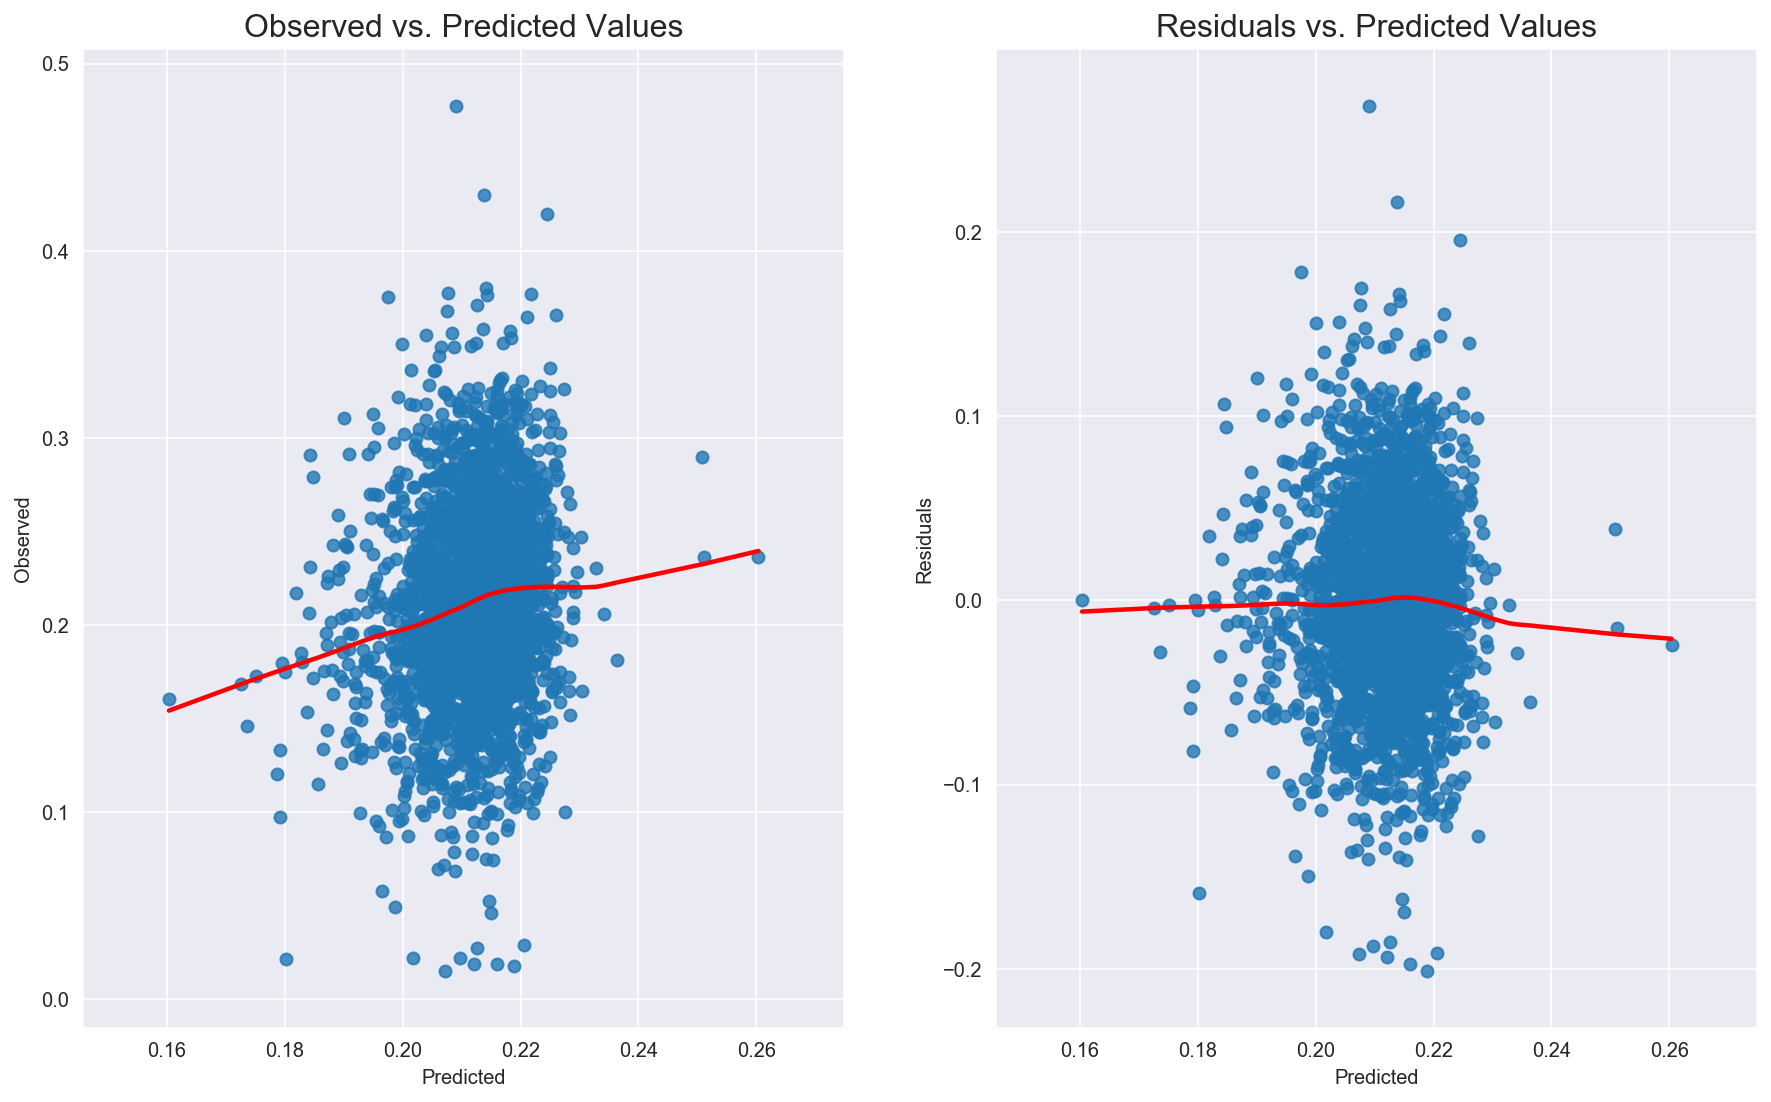

In [60]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(result, y)    

These are the columns in the file:
- `AssignmentId`: Unique ID of this story
- `WorkTimeInSeconds`: Time in seconds that it took the worker to do the entire HIT (reading instructions, storywriting, questions)
- `WorkerId`: Unique ID of the worker (random string, not MTurk worker ID)
- `annotatorAge`: Lower limit of the age bucket of the worker. Buckets are: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55+
- `annotatorGender`: Gender of the worker
- `annotatorRace`: Race/ethnicity of the worker|
- `distracted`: How distracted were you while writing your story? (5-point Likert)
- `draining`: How taxing/draining was writing for you emotionally? (5-point Likert)
- `frequency`: How often do you think about or talk about this event? (5-point Likert)
- `importance`: How impactful, important, or personal is this story/this event to you? (5-point Likert)
- `logTimeSinceEvent`: Log of time (days) since the recalled event happened
- `mainEvent`: Short phrase describing the main event described
- `memType`: Type of story (recalled, imagined, retold)
- `mostSurprising`: Short phrase describing what the most surpring aspect of the story was
- `openness`: Continuous variable representing the openness to experience of the worker
- `recAgnPairId`: ID of the recalled story that corresponds to this retold story (null for imagined stories). Group on this variable to get the recalled-retold pairs.
- `recImgPairId`: ID of the recalled story that corresponds to this imagined story (null for retold stories). Group on this variable to get the recalled-imagined pairs.
- `similarity`: How similar to your life does this event/story feel to you? (5-point Likert)
- `similarityReason`: Free text annotation of similarity
- `story`: Story about the imagined or recalled event (15-25 sentences)
- `stressful`: How stressful was this writing task? (5-point Likert)
- `summary`: Summary of the events in the story (1-3 sentences)
- `timeSinceEvent`: Time (num. days) since the recalled event happened

**the average similarity score between age groups for retold**

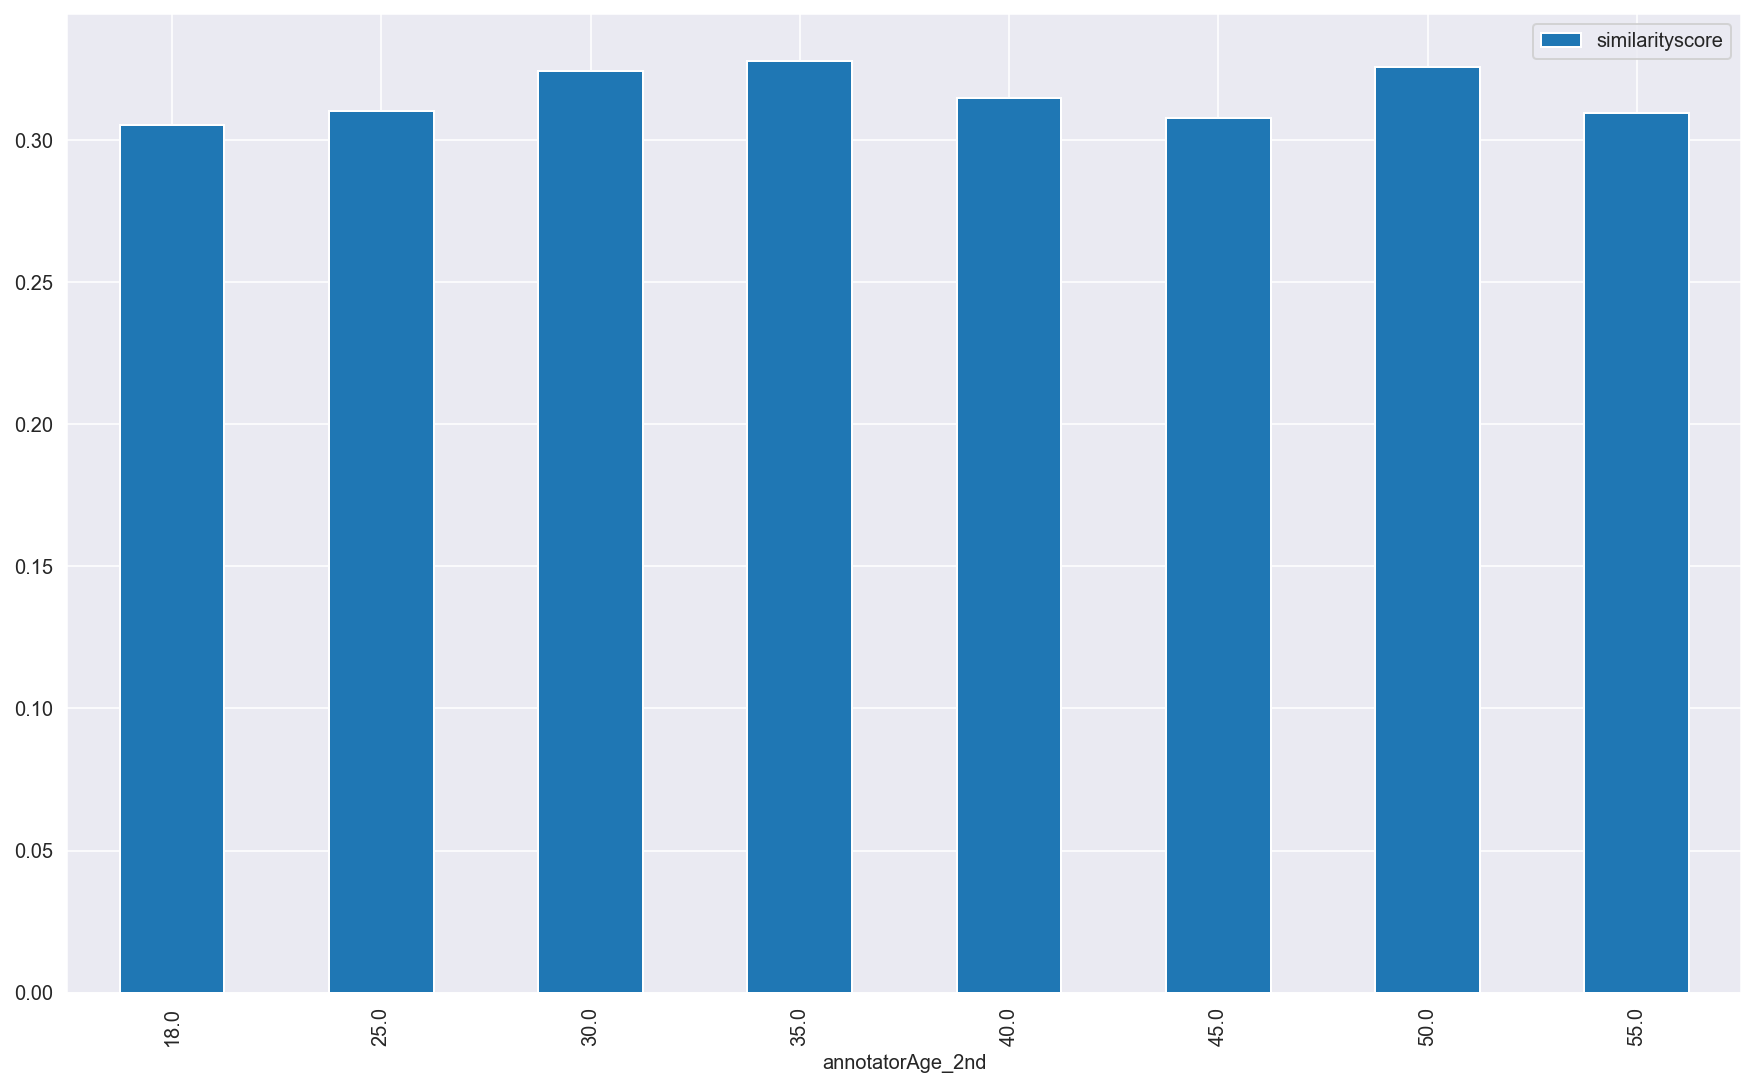

In [55]:
retold_table[["annotatorAge_2nd", "similarityscore"]].groupby("annotatorAge_2nd").mean().plot(kind='bar')
#potential questions: we see more or less an accurate picture for younger ages and accuracy,
#but there is a spike for age 50 before dropping again, why?

**average time that it took each age group for retold**

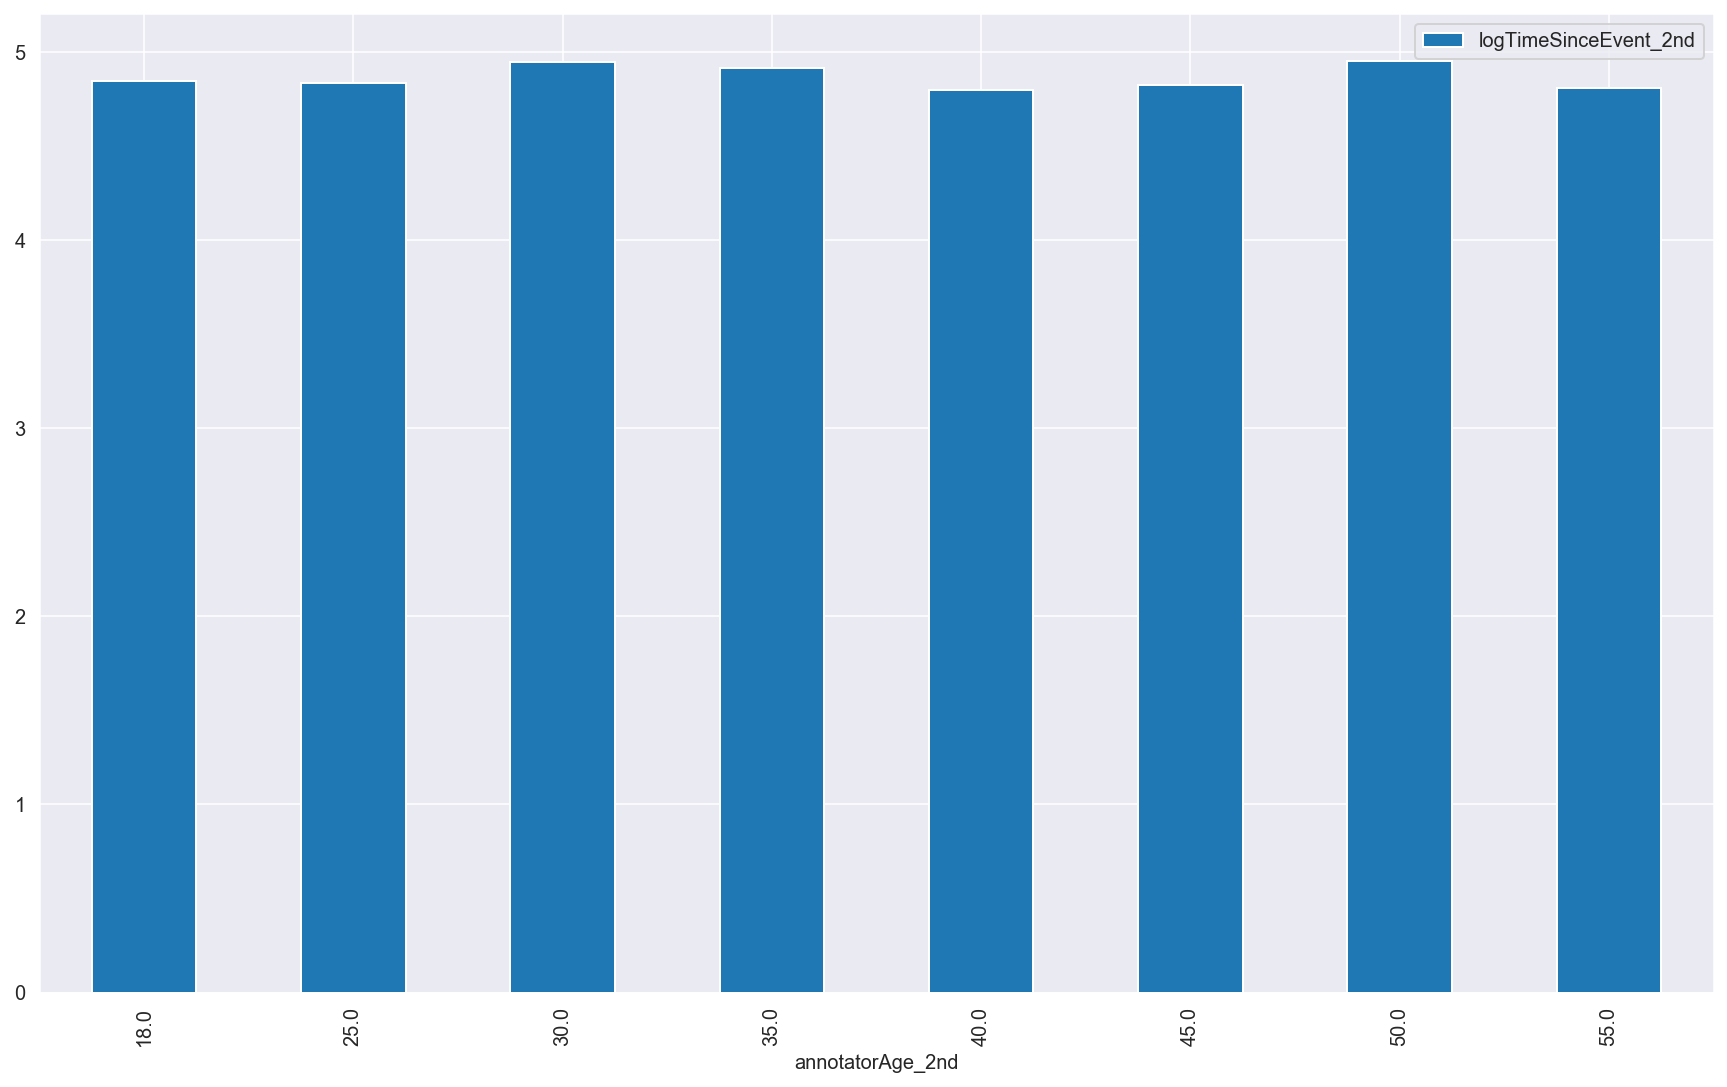

In [56]:
retold_table[["annotatorAge_2nd", "logTimeSinceEvent_2nd"]].groupby("annotatorAge_2nd").mean().plot(kind='bar')
#The age 50 group had a very high average amount of time since the event was told to them, 
#do they better memory? or what is going on?

**the average similarity score between age groups for imagined**

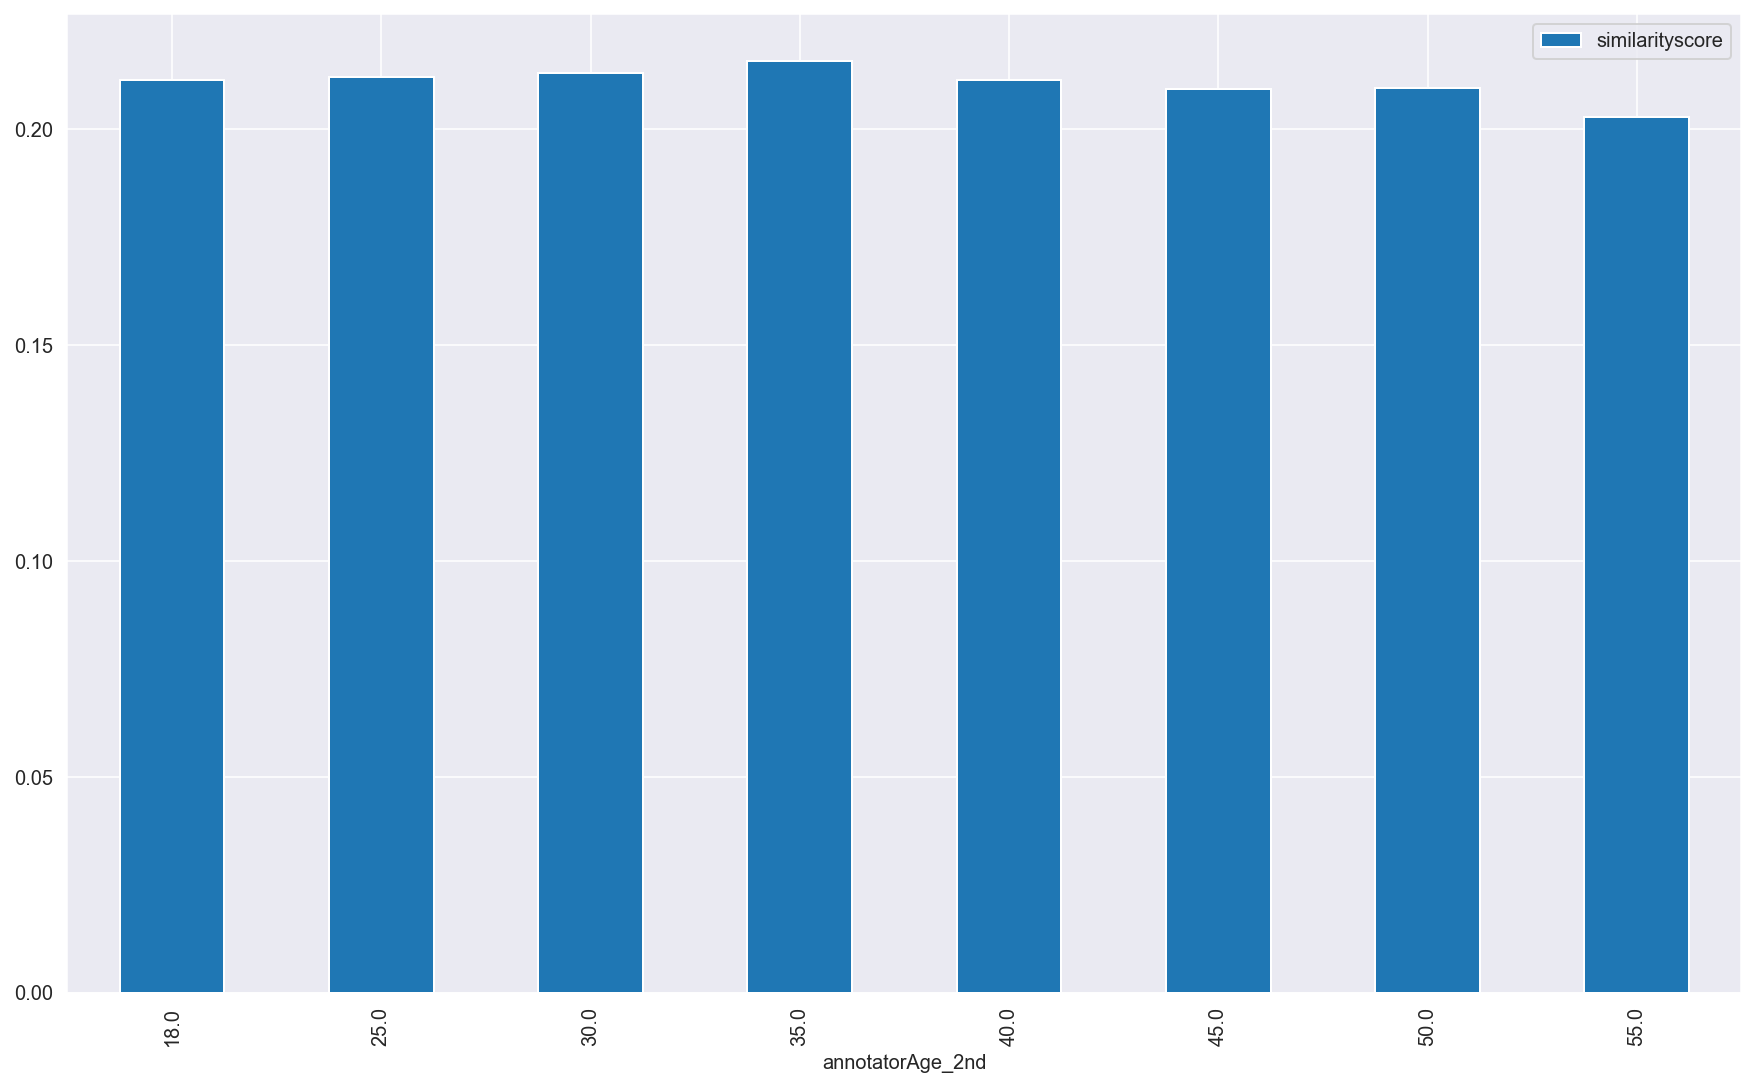

In [57]:
imagined_table[["annotatorAge_2nd", "similarityscore"]].groupby("annotatorAge_2nd").mean().plot(kind='bar')
# this is more inline with expectations, but why is it that imagined accuracy is lower for older people?

**average time that it took each age group for imagined**

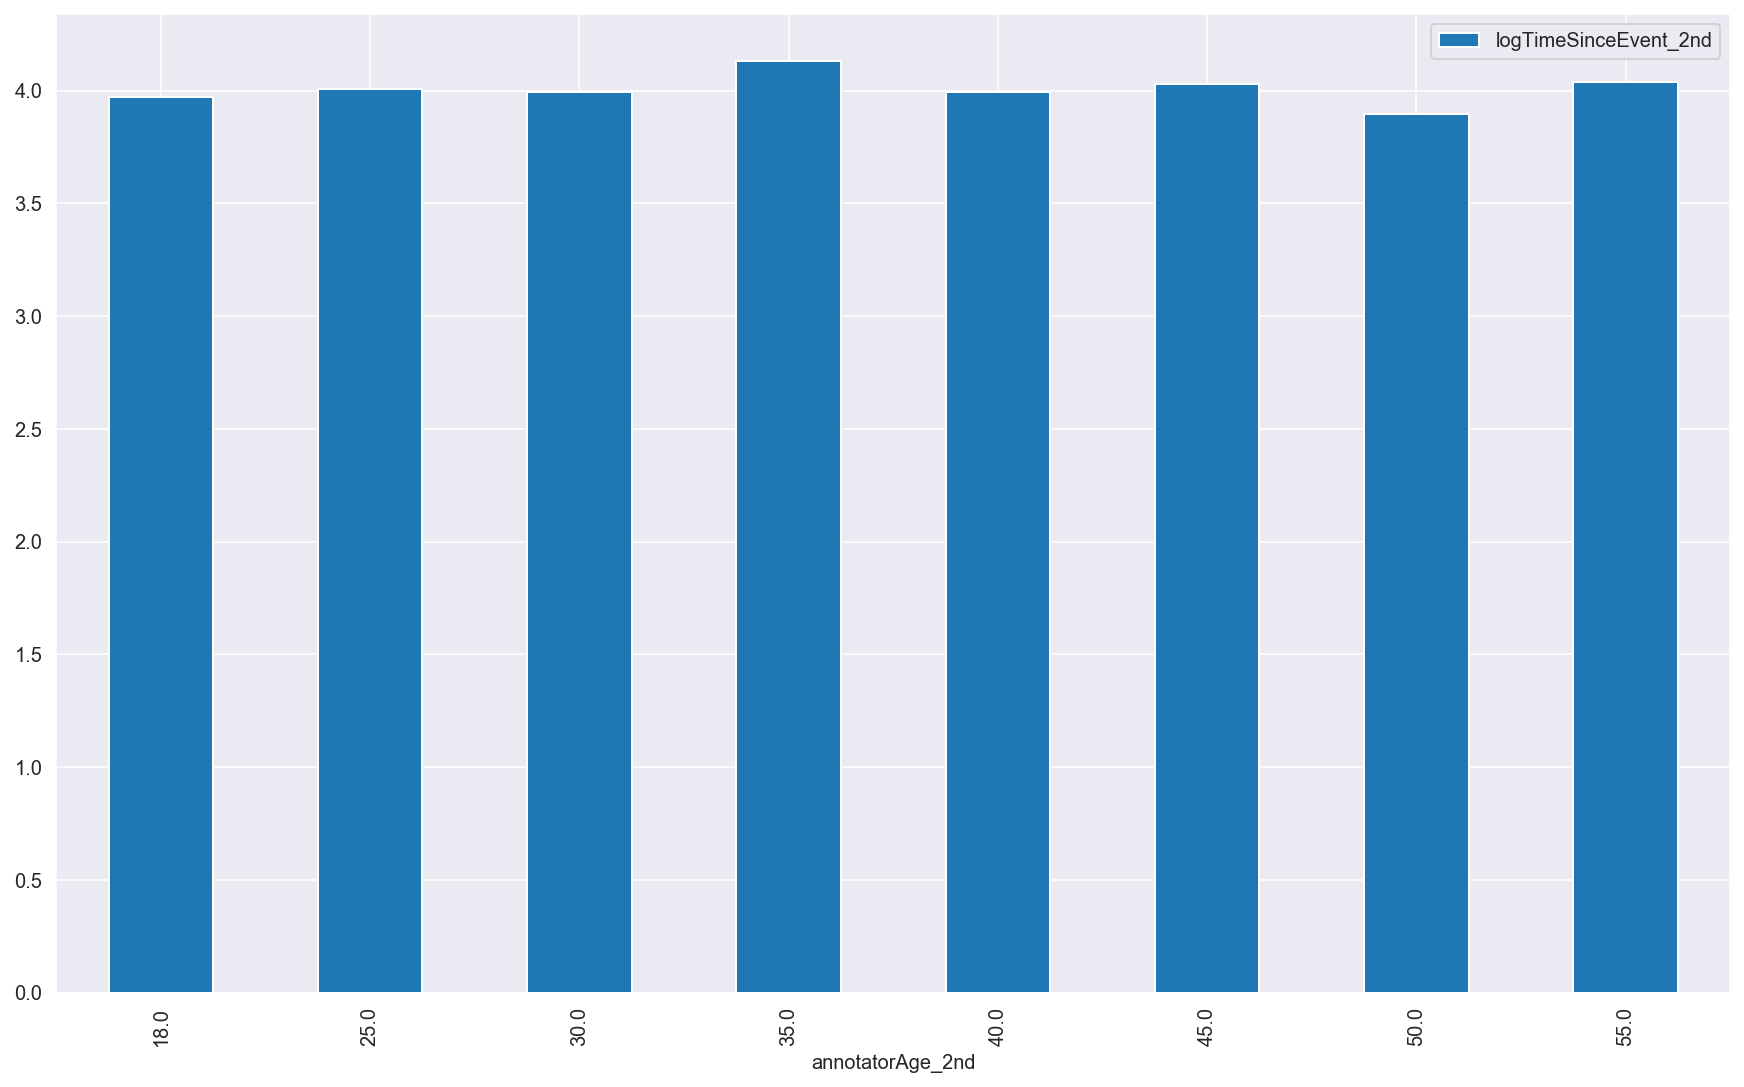

In [58]:
imagined_table[["annotatorAge_2nd", "logTimeSinceEvent_2nd"]].groupby("annotatorAge_2nd").mean().plot(kind='bar')
#These people also benefited from having less time to remember the event. 

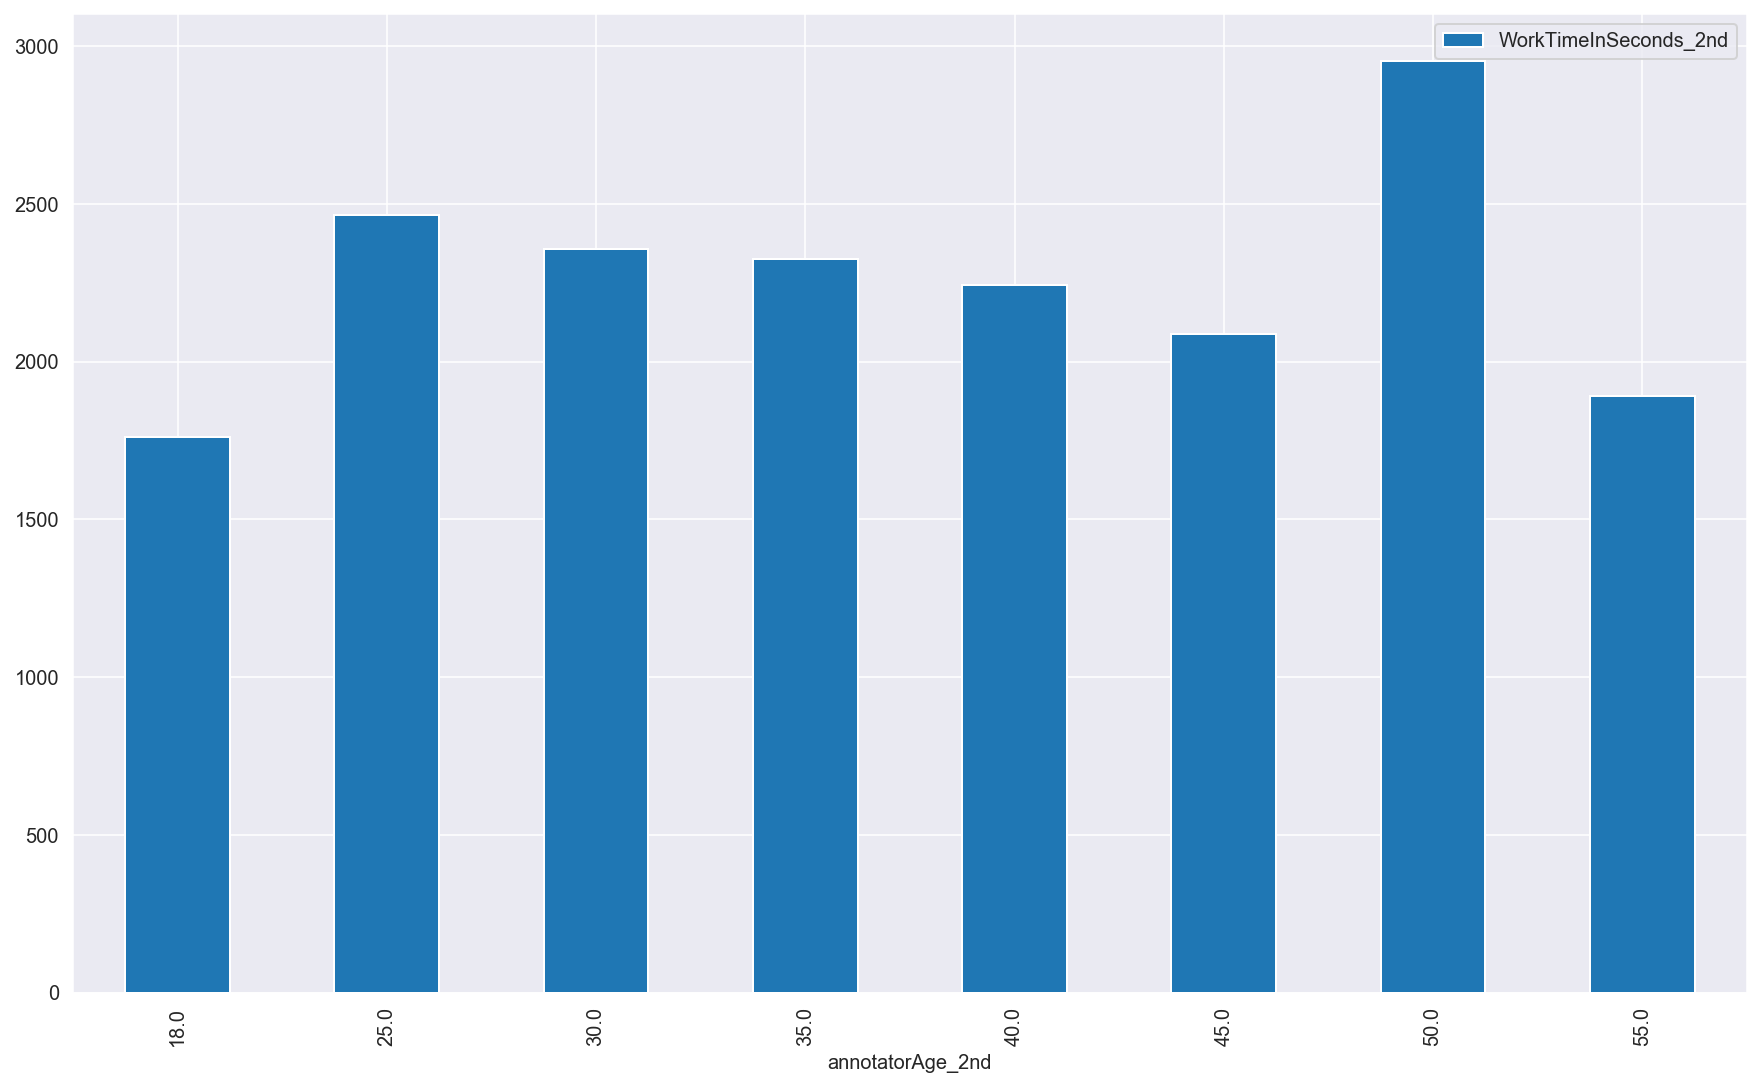

In [59]:
imagined_table[["annotatorAge_2nd", "WorkTimeInSeconds_2nd"]].groupby("annotatorAge_2nd").mean().plot(kind='bar')